# Classification d'images médicales
## Le projet
Projet de MLOps
Machine learning end to end allant du dataset ( interpretation, pre processing, analyse) en passant par le développement jusqu'au déployement avec une notion d'explicabilité nécessaire dans notre cas d'étude à savoir l'imagerie médicale.
Notre dataset est composé d'images médicales cérébrales à classifier grâce au machine learning. Deux algorithmes basés sur la méthode transformer sont proposés : transformer + heatmap ou transformer + attention rollout. 
## Qu'est ce que transformers? 
Les algorithmes de Transformer avec déploiement d'attention ou cartes thermiques sont des techniques pour visualiser et comprendre comment un modèle de vision Transformer fait des prédictions. Ils peuvent être utiles pour améliorer la transparence et la compréhension des modèles de vision, ce qui peut être important dans des domaines tels que la médecine où les décisions du modèle peuvent avoir des conséquences importantes pour les patients.

Les algorithmes de Transformer avec déploiement d'attention permettent de visualiser les régions de l'image qui ont été les plus influentes pour une prédiction donnée. Cela peut aider à comprendre comment le modèle interagit avec les différentes parties de l'image pour faire des prédictions. Les algorithmes de cartes thermiques fonctionnent de manière similaire, en utilisant une représentation visuelle pour montrer les régions de l'image qui ont été les plus importantes pour une prédiction.

Dans le cas d'un projet de classification de tumeurs cérébrales à l'aide d'un modèle de Vision Transformer, ces algorithmes pourraient être utiles pour comprendre comment le modèle fait des prédictions pour différents types de tumeurs et comment il utilise les informations de l'image pour faire des prédictions. Cela peut aider à identifier des domaines où le modèle peut être amélioré ou des sources potentielles de biais, ce qui peut améliorer la qualité et la fiabilité des résultats.



##Programmation


### Charger les données

####Importation des bibliothèques

In [ ]:
# Check the versions of libraries
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
#tensorflow
import tensorflow
print('tensorflow: {}'.format(tensorflow.__version__))

Python: 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2
tensorflow: 2.9.2


In [ ]:
#Import libraries as
import scipy as sc
import numpy as np
import matplotlib
import pandas as pd
import sklearn as sk
import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt


####Chargement du dataset

In [ ]:
#Chemin vers le dataset préalablement chargé dans le drive
path= "/content/drive/MyDrive/Projet_IA_Imagerie/dataset/"
#dataset = keras.utils.image_dataset_from_directory(path, batch_size=64, image_size=(200, 200))
dataset_train = keras.utils.image_dataset_from_directory(path +"Training")
dataset_test = keras.utils.image_dataset_from_directory(path +"Testing")

Found 2880 files belonging to 4 classes.
Found 394 files belonging to 4 classes.


### Résumer l'ensemble des données

1. Dimensions du jeu de données : Repartition des classes et nombre d'images par classes.


In [ ]:
print(dataset_test)
class_names=dataset_train.class_names
print(class_names)
nb_train=[826,822,395,827]
nb_test=[100,115,105,74]
total=[926,937,500,901]


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
print(type(dataset_train))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


2. Regardez les données elles-mêmes : Dimension des images


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


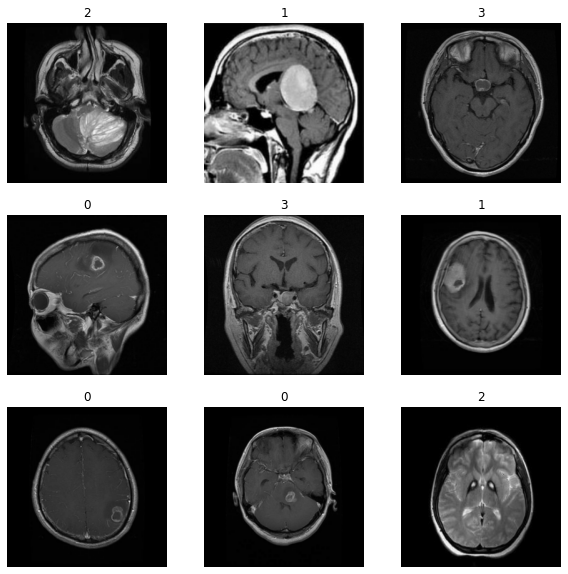

In [ ]:
#Visualisation des 9 premieres images

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

3. Résumé statistique de tous les attributs : Etude avec une matrice de correlation des pixel ( pixel  corrélé à pixel  ou pas. On va ainsi trouver les zones de l'images dans lesquels il y a des corrélations).
Faire également les tracés statistiques caractérisant nos données.


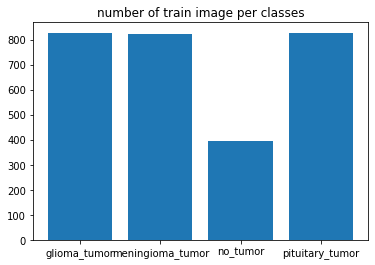

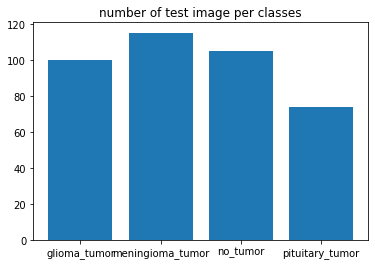

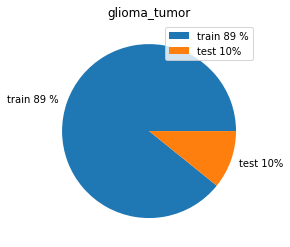

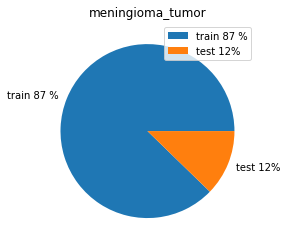

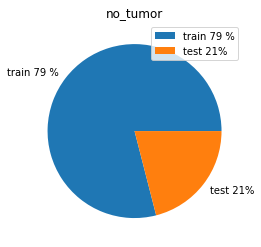

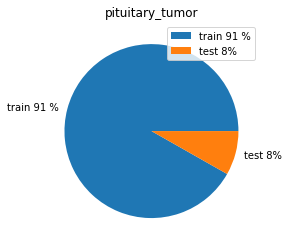

In [ ]:
#caracteristiques de nos données
plt.bar(class_names,nb_train)
plt.title("number of train image per classes")
plt.show()
plt.bar(class_names,nb_test)
plt.title("number of test image per classes")
plt.show()

for i in range(4):
    per_train=(100*nb_train[i])/total[i]
    per_test=(100*nb_test[i])/total[i] 
    plt.pie([per_train,per_test], labels = [f'train {int(per_train)} %', f'test {int(per_test)}%'])
    plt.title(class_names[i])
    plt.legend()
    plt.show()




4. Autres analyses

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (256, 256, 3)
Image Hight 256
Image Width 256
Dimension of Image 3
Image size 196608
Maximum RGB value in this image 255
Value of only R channel 113
Value of only G channel 113
Value of only B channel 113


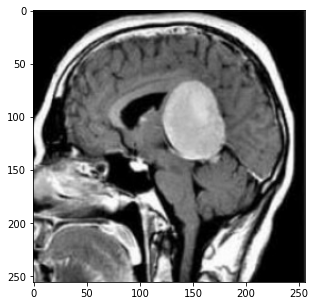

In [ ]:
import imageio
pic = images[1].numpy().astype("uint8")
plt.figure(figsize = (5,5))
plt.imshow(pic)
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))
print('Image size {}'.format(pic.size)) 
print('Maximum RGB value in this image {}'.format(pic.max())) 

# A specific pixel located at Row : 100 ; Column : 50  
# Each channel's value of it, gradually R , G , B  
print('Value of only R channel {}'.format(pic[ 100, 50, 0])) 
print('Value of only G channel {}'.format(pic[ 100, 50, 1])) 
print('Value of only B channel {}'.format(pic[ 100, 50, 2]))
#images en noir et blanc

In [ ]:
np.shape(pic)

(256, 256, 3)